##**Pythonで視覚化①：Occupancy_detection :binary**
Pythonで視覚化① で使用するデータセットは、[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) で公開されている [Occupancy_detection] です。

###**このデータセットについて**
[[Occupancy_detection]データセット](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+) は、1分間隔で記録「date(日時分)」された、ある部屋の「温度(℃)、相対湿度(％)、明るさ(Lux)、CO2(ppm)、湿度比(kgwater-vapor/kg-air)」と「その時点での人の存在Ocuupancy」のデータで構成されています。
目的変数である「人の存在[Ocuupancy]」は yes/no の二値、データは「date(日時分)」に沿った時系列データとなっており、「人の存在によって部屋の状況はどのように変化するか」や「部屋の状況で人の存在が予測できるか」を意図したものとなっています。

▼データセットのソースには、1分ごとに撮影したタイムスタンプ付きの写真で人の存在を確認とあります。

###**手順**
- 「1．インストール」の「▷」をクリックしてください。（インストールが実行されます）。
- Select_Datasetのドロップダウンメニュー(dataset:)で[Occupancy_detection :binary]を選択してください。
- Load dataset の「▷」をクリックしてください。（データセットが読み込まれます）。

## **1．インストール**

In [1]:
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install seaborn==0.11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [3]:
!pip install seaborn-analyzer==0.2.13

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.6 MB/s eta 0:00:00


In [4]:
!pip install pandas-bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **2．データセット読込み**

In [5]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = 'Occupancy_detection :binary' #@param ['Boston_housing :regression', 'Diabetes :regression', 'Breast_cancer :binary','Titanic :binary', 'Titanic(seaborn) :binary', 'Iris :classification', 'Loan_prediction :binary','wine :classification', 'Occupancy_detection :binary', 'Upload']

In [6]:
#@title Load dataset

#ライブラリインポート
#import numpy as np    #数値計算ライブラリ
import pandas as pd   #データを効率的に扱うライブラリ
import seaborn as sns #視覚化ライブラリ
import warnings       #警告を表示させないライブラリ
warnings.simplefilter('ignore')

'''
dataset（ドロップダウンメニュー）で選択したデータセットを読込み、データフレーム（df）に格納。
目的変数は、データフレームの最終列とし、FEATURES、TARGET、X、yを指定した後、データフレーム
に関する情報と先頭5列を表示。
任意のcsvデータを読込む場合は、datasetで'Upload'を選択。

'''

#任意のcsvデータ読込み及びデータフレーム格納、
if dataset =='Upload':
  from google.colab import files
  uploaded = files.upload()#Upload
  target = list(uploaded.keys())[0]
  df = pd.read_csv(target)

#Diabetes データセットの読込み及びデータフレーム格納、
elif dataset == "Diabetes :regression":
  from sklearn.datasets import load_diabetes
  diabetes = load_diabetes()
  df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
  df['target'] = diabetes.target

#Breast_cancer データセットの読込み及びデータフレーム格納、
elif dataset == "Breast_cancer :binary":
  from sklearn.datasets import load_breast_cancer
  breast_cancer = load_breast_cancer()
  df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
  #df['target'] = breast_cancer.target  #目的変数をカテゴリー数値とする時
  df['target'] = breast_cancer.target_names[breast_cancer.target]

#Titanic データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic :binary":
  data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
  df = pd.read_csv(data_url)
  #目的変数 Survived をデータフレーム最終列に移動
  X = df.drop(['Survived'], axis=1)
  y = df['Survived']
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#Titanic(seaborn) データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic(seaborn) :binary":
  df = sns.load_dataset('titanic')
  #重複データをカットし、目的変数 alive をデータフレーム最終列に移動
  X = df.drop(['survived','pclass','embarked','who','adult_male','alive'], axis=1)
  y = df['alive']                   #目的変数データ
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#iris データセットの読込み及びデータフレーム格納、
elif dataset == "Iris :classification":
  from sklearn.datasets import load_iris
  iris = load_iris()
  df = pd.DataFrame(iris.data, columns = iris.feature_names)
  #df['target'] = iris.target  #目的変数をカテゴリー数値とする時
  df['target'] = iris.target_names[iris.target]

#wine データセットの読込み及びデータフレーム格納、
elif dataset == "wine :classification":
  from sklearn.datasets import load_wine
  wine = load_wine()
  df = pd.DataFrame(wine.data, columns = wine.feature_names)
  #df['target'] = wine.target  #目的変数をカテゴリー数値とする時
  df['target'] = wine.target_names[wine.target]

#Loan_prediction データセットの読込み及びデータフレーム格納、
elif dataset == "Loan_prediction :binary":
  data_url = "https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/raw/master/train.csv"
  df = pd.read_csv(data_url)

#Occupancy_detection データセットの読込み及びデータフレーム格納、
elif dataset =='Occupancy_detection :binary':
  data_url = 'https://raw.githubusercontent.com/hima2b4/Auto_Profiling/main/Occupancy-detection-datatest.csv'
  df = pd.read_csv(data_url)
  df['date'] = pd.to_datetime(df['date'])    #[date]のデータ型をdatetime型に変更

#Boston データセットの読込み及びデータフレーム格納
else:
  from sklearn.datasets import load_boston
  boston = load_boston()
  df = pd.DataFrame(boston.data, columns = boston.feature_names)
  df['target'] = boston.target

#FEATURES、TARGET、X、yを指定
FEATURES = df.columns[:-1]    #説明変数のデータ項目を指定
TARGET = df.columns[-1]       #目的変数のデータ項目を指定
X = df.loc[:, FEATURES]       #FEATURESのすべてのデータをXに格納
y = df.loc[:, TARGET]         #TARGETのすべてのデータをyに格納

#データフレーム表示
df.info(verbose=True)         #データフレーム情報表示（verbose=Trueで表示数制限カット）
df.head()                     #データフレーム先頭5行表示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2665 non-null   datetime64[ns]
 1   Temperature    2665 non-null   float64       
 2   Humidity       2665 non-null   float64       
 3   Light          2665 non-null   float64       
 4   CO2            2665 non-null   float64       
 5   HumidityRatio  2665 non-null   float64       
 6   Occupancy      2665 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 145.9+ KB


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,yes
1,2015-02-02 14:19:00,23.7180,26.290,578.400000,760.400000,0.004773,yes
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,yes
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,yes
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,yes


### **Pairplot**

<Figure size 640x480 with 0 Axes>

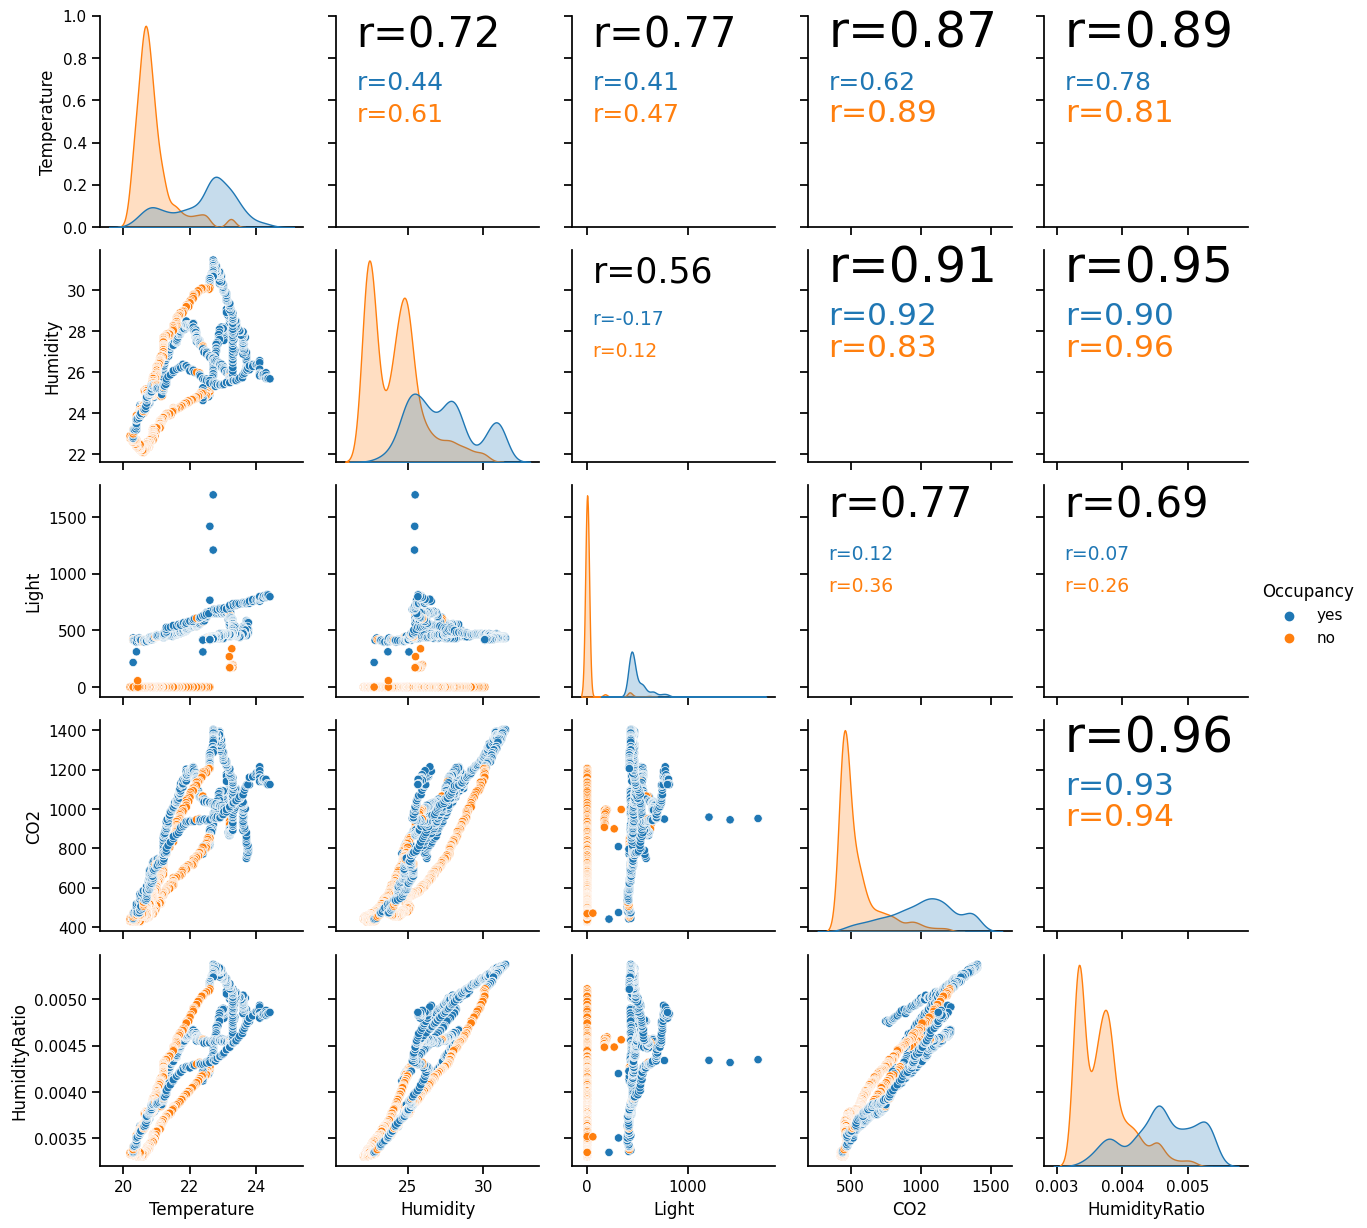

In [7]:
#@title Pairplot_classification

from seaborn_analyzer import CustomPairPlot

cp = CustomPairPlot()
cp.pairanalyzer(df, hue=TARGET)


In [ ]:
#@title **データ項目一覧**
#@markdown **※データ項目一覧を表示します。以後のデータ項目の入力は、表示された項目をコピーアンドペーストすると確実です。**
print('データ項目名：',df.columns.values)

## **3．視覚化**

### **ヒストグラム**

In [ ]:
#@title　Histgram_pandas(matplotlib)

Column_name =  'xxx'#@param {type:"raw"}
bins_number_slider = 12 #@param {type:"slider", min:5, max:20, step:1}

import math
print('------------------------------------------------------------')
print('階級数（スタージェスの公式）：',round(1 + math.log2(len(df))))
print('------------------------------------------------------------')

#df[Column_name].hist(bins=bins_number_slider);
df.hist(Column_name, bins=bins_number_slider);
#df[Column_name].plot.hist();

In [ ]:
#@title　Histogram for each target variable_pandas(matplotlib)

Column_name =  'xxx'#@param {type:"raw"}
Category_column_name =  'xxx'#@param {type:"raw"}

#df[Column_name].hist(by=df[Category_column_name],sharex=True, sharey=True);
df.hist(Column_name,by=df[Category_column_name],sharex=True, sharey=True);

In [ ]:
#@title Histogram for each target variable_plotnine
Column_name =  'xxx'#@param {type:"raw"}
Category_column_name =  'xxx'#@param {type:"raw"}

from plotnine import *

(ggplot(df, aes(x = Column_name, fill = Category_column_name))
 + geom_histogram()
 + facet_wrap(Category_column_name))

In [ ]:
#@title Stratified histogram by category_plotnine

Column_name =  'xxx'#@param {type:"raw"}
Category_column_name =  'xxx'#@param {type:"raw"}
bins_number_slider = 15 #@param {type:"slider", min:5, max:20, step:1}

from plotnine import *

(ggplot(df, aes(Column_name, fill = Category_column_name))
 + geom_histogram(bins = bins_number_slider, position = "identity", alpha = 0.7)
)

### **折れ線グラフ**

In [ ]:
#@title Line-plot_pandas(matplotlib)

X_column_name =  'xxx'#@param {type:"raw"}

#df.plot(x = X_column_name);
df.plot(kind='line', x = X_column_name);

In [ ]:
#@title Line-plot(subplot)_pandas(matplotlib)

X_column_name =  'xxx'#@param {type:"raw"}

df.plot(kind='line',x= X_column_name, subplots= True,
        #figsize= (6,6),
        #title='pandas subplots',
        #grid=True,
        #colormap='Accent',
        #alpha=0.5
        );

In [ ]:
#@title Line-plot with rangetool_pandas-bokeh

X_column_name =  'xxx'#@param {type:"raw"}

import pandas_bokeh
pandas_bokeh.output_notebook()

df.plot_bokeh(x = X_column_name,rangetool=True)